# How to use the Transformer class from PyStoG

This tutorial shows how to use the `Transformer` class from `pystog`


## Converting real space functions

To use the `transformer` class, we first need some data. Lets load in some test data for Argon from our test suite. 
We are going to extract the $r$ and $g(r)$ from small molecular dynamics simualtions generated using [LAMMPS](https://lammps.sandia.gov/). 

In [2]:
import numpy as np
i, r, gr, nr = np.loadtxt("../data/test_data/argon.gr", unpack=True, skiprows=5)
r

array([ 0.075,  0.125,  0.175, ..., 63.875, 63.925, 63.975])

Let's look at the data that we imported:

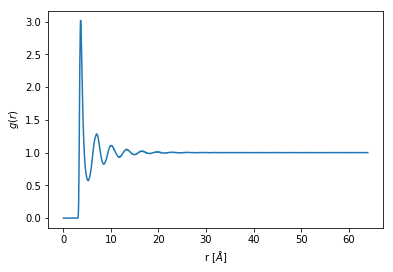

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(r, gr)
plt.ylabel("$g(r)$")
plt.xlabel("r [$\AA$]")
plt.show()

Okay, now we initialize the `Transformer` class:

In [4]:
from pystog import Transformer
transformer = Transformer()

We need to pass in some material-specific information to the converter
functions. Here is a dictionary of the values we need. There is also a testing
utility class `Argon` with these values for the dataset found [here](https://github.com/marshallmcdonnell/pystog/blob/master/tests/materials.py).

In [5]:
kwargs = {"rho": 0.02138, 
          "<b_coh>^2": 3.644, 
          "<b_tot^2>": 5.435
         }

We also need to create the $Q$ vector domain we will map our Fourier transform to:

In [6]:
import numpy as np
buffer = 0.001
q = np.arange(0.12, 35. + buffer, 0.02)
q

array([ 0.12,  0.14,  0.16, ..., 34.96, 34.98, 35.  ])

We now have the functions available to convert our $g(r)$ function to reciprocal space functions:

In [7]:
q, sq = transformer.g_to_S(r, gr, q, **kwargs)
q, fq = transformer.g_to_F(r, gr, q, **kwargs)
q, fq_keen = transformer.g_to_FK(r, gr, q, **kwargs)
q, dcs = transformer.g_to_DCS(r, gr, q, **kwargs)

Now we can plot the functions to compare:

Text(0.5, 15.000000000000028, 'Q [$\\AA^{-1}$]')

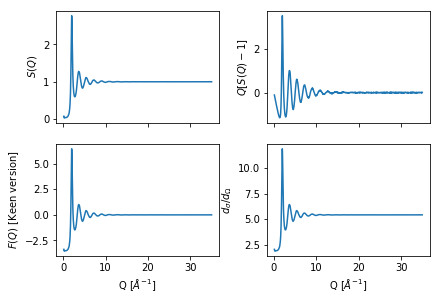

In [8]:
#Creates two subplots and unpacks the output array immediately
f, ax = plt.subplots(2, 2, sharex=True)
f.tight_layout()
xlabel = 'Q [$\AA^{-1}$]'

ax[0, 0].plot(q, sq)
ax[0, 0].set_ylabel('$S(Q)$')

ax[0, 1].plot(q, fq)
ax[0, 1].set_ylabel('$Q[S(Q)-1]$')
ax[1, 1].set_xlabel(xlabel)

ax[1, 0].plot(q, fq_keen)
ax[1, 0].set_ylabel('$F(Q)$ [Keen version]')
ax[1, 0].set_xlabel(xlabel)

ax[1, 1].plot(q, dcs)
ax[1, 1].set_ylabel('$d_{\sigma} / d_{\Omega}$')
ax[1, 1].set_xlabel(xlabel)


## Converting reciprocal space functions

In [9]:
from pystog import Transformer
transformer = Transformer()

Now let us load in some reciprocal space test data for Argon from our test suite. 
We are going to extract the $Q$ and $S(Q)$. These are actually generated exactly how we did in the tutorial above:

In [10]:
import numpy as np
q, sq = np.loadtxt("../data/test_data/argon.reciprocal_space.dat", unpack=True, skiprows=2, usecols=(0,1))
q = q[5:]
sq = sq[5:]

Add lets look at the data we imported:

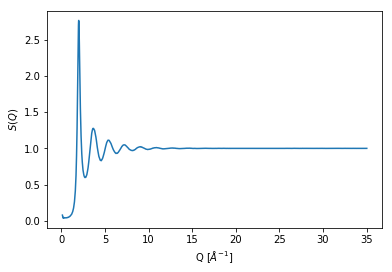

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(q, sq)
plt.ylabel('$S(Q)$')
plt.xlabel('Q [$\AA^{-1}$]')
plt.show()

Again, we need to pass in some material-specific information to the converter
functions. We replicate the `kwargs` just for convenience here:

In [12]:
kwargs = {"rho": 0.02138, 
          "<b_coh>^2": 3.644, 
          "<b_tot^2>": 5.435
         }

We also need to create the $r$ vector domain we will map our Fourier transform to:

In [15]:
import numpy as np
buffer = 0.001
r = np.arange(0.075, 63.975 + buffer, 0.05)
r

array([ 0.075,  0.125,  0.175, ..., 63.875, 63.925, 63.975])

In [16]:
r, gr = transformer.S_to_g(q, sq, r, **kwargs)
r, GofR = transformer.S_to_G(q, sq, r, **kwargs)
r, GKofR = transformer.S_to_GK(q, sq, r, **kwargs)


And let us plot the output data:

Text(0.5, 0, 'r [$\\AA$]')

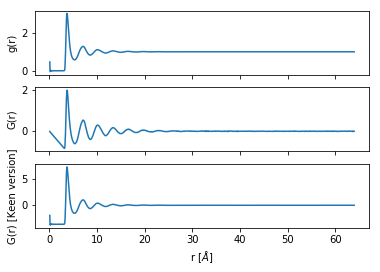

In [17]:
#Creates two subplots and unpacks the output array immediately
f, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(r, gr)
ax[0].set_ylabel('g(r)')

ax[1].plot(r, GofR)
ax[1].set_ylabel('G(r)')

ax[2].plot(r, GKofR)
ax[2].set_ylabel('G(r) [Keen version]')
ax[2].set_xlabel('r [$\AA$]')
